# 머신러닝을 이용한 붓꽃 품종 분류



[출처 : https://blog.naver.com/ssdyka/221225352336]

## 데이터 셋 가져오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## 붓꽃의 품종 확인

In [2]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 각 품종을 분류하는 특성 확인

In [3]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

##데이터 셋에 대한 간략한 설명 확인

In [4]:
print(iris_dataset['DESCR'][:193] + '\n')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre



## 데이터 확인하기

**data : 꽃잎의 길이와 폭, 꽃받침의 길이와 폭을 수치로 가지고 있는 numpy 배열

In [5]:
# 데이터의 타입과 크기(모양) 확인
print('Type of data : {}'.format(iris_dataset['data'].dtype))
print('Size of data : {}'.format(iris_dataset['data'].shape))

Type of data : float64
Size of data : (150, 4)


**target : 샘플 붓꽃의 품종 이름을 가지고 있는 numpy 배열 

In [6]:
print('Type of target : {}'.format(iris_dataset['target'].dtype))
print('Size of target : {}'.format(iris_dataset['target'].shape))

Type of target : int64
Size of target : (150,)


##훈련 데이터와 테스트 데이터 나누기

- 150개의 붓꽃 데이터를 훈련 데이터(75%)와 테스트 데이터(25%)로 나눈다.
- 2차원 배열 형태인 data를 X, 1차원 배열 형태인 target을 y로 표현한다. y = f(X)
- 옵션 test_size : 기본값 0.25, 예 : test_size = 0.3
- 옵션 random_state : 정수를 입력하면 숫자를 random하게 생성할 때 사용되는 seed 숫자로 사용
- 옵션 shuffle : bool값, 데이터를 분리하기 전에 섞을 것인지를 지정, 기본값은 True

**train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)** <br>
(1) Parameter <br>
* arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
* test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
* train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
* random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
* shuffle : 셔플여부설정 (default = True)
* stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) # 

print('X_train의 크기와 모양 : {}'.format(X_train.shape))
print('y_train의 크기와 모양 : {}'.format(y_train.shape))
print('X_test의 크기와 모양 : {}'.format(X_test.shape))
print('y_test의 크기와 모양 : {}'.format(y_test.shape))
# 75%와 25%로 나누어질 것이다. 

X_train의 크기와 모양 : (112, 4)
y_train의 크기와 모양 : (112,)
X_test의 크기와 모양 : (38, 4)
y_test의 크기와 모양 : (38,)


##데이터의 이상 유무 살펴보기

- 머신러닝이 없어도 풀 수 있는 문제는 아닌지...
- 필요한 정보가 누락되지 않았는지...
- 비정상적인 값이나 특이값은 없는지...

#### mglearn 라이브러리 설치

mglearn 라이브러리는 안드레아스 뮐러가 '파이썬 라이브러리를 활용한 머신러닝'이라는 책을 저술하면서 책에 필요한 그래프와 데이터셋을 손쉽게 다루기 위하여 만든 라이브러리이다.

In [8]:
!apt install mglearn
!pip install mglearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package mglearn
     |████████████████████████████████| 542kB 6.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a39a9a6859e80f63fa928fb2838c94965cde63413243dad3fcb36291622e0c5d
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [9]:
import mglearn
import matplotlib.pyplot as plt
import seaborn as sb

##X_train 데이터를 사용하여 데이터프레임 만들기

In [10]:
#칼럼의 이름 : iris_dataset.feature_names에 있는 문자열을 이용
dfIris = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
dfIris['kind'] = y_train
dfIris
# 0 :'setosa', 1 : 'versicolor', 2 :'virginica'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.9,3.0,4.2,1.5,1
1,5.8,2.6,4.0,1.2,1
2,6.8,3.0,5.5,2.1,2
3,4.7,3.2,1.3,0.2,0
4,6.9,3.1,5.1,2.3,2
...,...,...,...,...,...
107,4.9,3.1,1.5,0.1,0
108,6.3,2.9,5.6,1.8,2
109,5.8,2.7,4.1,1.0,1
110,7.7,3.8,6.7,2.2,2


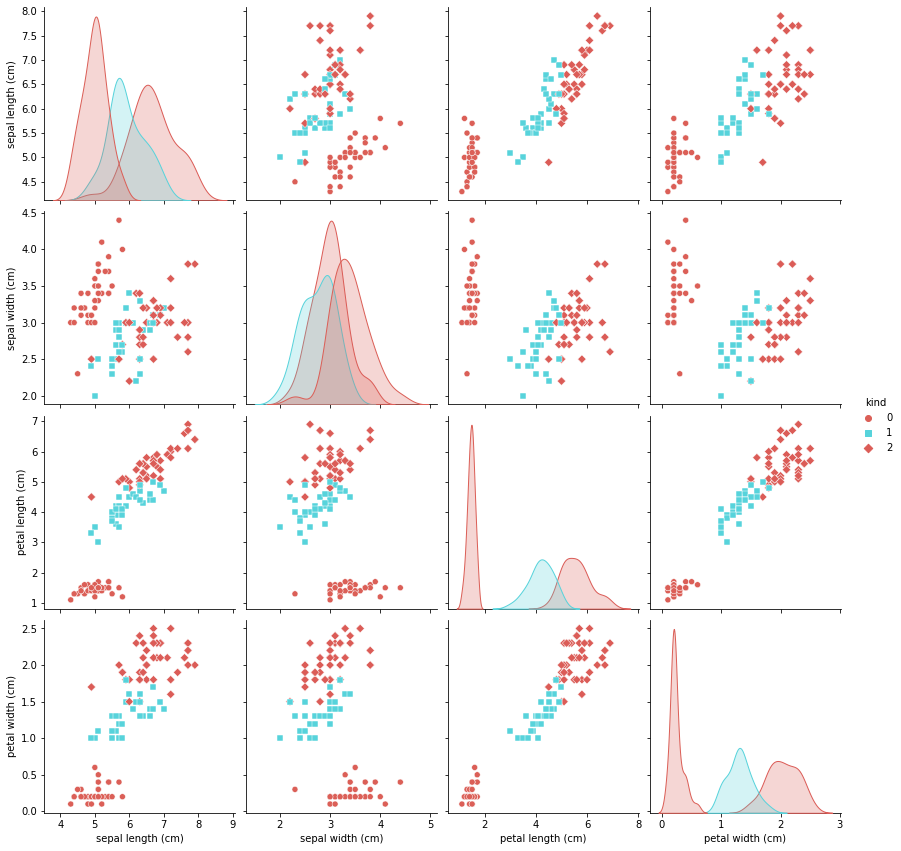

In [11]:
sb.pairplot(dfIris, vars=['sepal length (cm)',  'sepal width (cm)',  'petal length (cm)',  'petal width (cm)'], 
            hue = 'kind', markers=["o", "s", "D"], palette="hls", height=3)
plt.show()

# seaboarn color palette : tab10, hls, husl, Set2, Paired
# https://seaborn.pydata.org/tutorial/color_palettes.html

##KNN(K-근접 이웃) 알고리즘

k-최근접 이웃 알고리즘은 새 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 찾는다. 그런 다음 찾은 훈련 데이터릐 레이블을 새 테이터 포인트의 레이블로 지정한다.

k는 훈련데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다는 의미이다.

In [12]:
from sklearn.neighbors import KNeighborsClassifier as knc
knn = knc(n_neighbors = 3)
knn.fit(X_train, y_train)
knc(algorithm = 'auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1,
    n_neighbors=3, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
X_new = np.array([[5,2.9,1,0.2]])
prediction = knn.predict(X_new)

print("예측 : {}".format(prediction))
print("예측한 타깃의 이름: {}".format(iris_dataset['target_names'][prediction]))

예측 : [0]
예측한 타깃의 이름: ['setosa']


##테스트 셋 확인하기

In [ ]:
dfIrisTestSet = pd.DataFrame(X_test, columns=iris_dataset.feature_names)
dfIrisTestSet

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.8,2.8,5.1,2.4
1,6.0,2.2,4.0,1.0
2,5.5,4.2,1.4,0.2
3,7.3,2.9,6.3,1.8
4,5.0,3.4,1.5,0.2
5,6.3,3.3,6.0,2.5
6,5.0,3.5,1.3,0.3
7,6.7,3.1,4.7,1.5
8,6.8,2.8,4.8,1.4
9,6.1,2.8,4.0,1.3


##테스트 셋의 테스트 결과 확인하기

In [ ]:
y_pred = knn.predict(X_test)

print("테스트 세트에 대한 예측값  \n {}".format(y_pred))
print("테스트 세트의 정확도 : {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트에 대한 예측값  
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
테스트 세트의 정확도 : 0.97


##정답 확인하기

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])